# Library

In [2]:
import os
from os import listdir
from os.path import isfile, join
import json
import pandas as pd
from openai import OpenAI
import random
from collections import Counter
import numpy as np

from krippendorff import alpha

from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt

## BRAT File Reader

In [3]:
def read_file_brat(file_name_ann, dict_file = dict()):

    #file_name_ann is ann file in brat folder
    #dict_file optional. Can increment a dictionary if pass as parameter.
    #if not it will create from scratch

    #txt file name
    #need to be in same folder
    file_name_txt = file_name_ann[:-3] + 'txt'

    if os.path.isfile(file_name_ann) and os.path.isfile(file_name_txt):

        #annotated file
        f = open(file_name_ann)
        annot_file_list = f.readlines()
        annot_file_list = [x.replace('\n','') for x in annot_file_list]

        #raw file
        f = open(file_name_txt)
        raw_file_list = f.readlines()
        raw_file_list = [x.replace('\n','') for x in raw_file_list]

        #fill all IDs from raw text
        for x in raw_file_list:
            dict_file[x.split('     ')[0]] = ""

        #put labels on ids
        for x in annot_file_list:
            slices = x.split('\t')
            if slices[0][0]=='T':
                dict_file[slices[2]] = slices[1].split(' ')[0]

        
        #return final dict
        return dict_file

    else:
        print("Check the files. Maybe they dont exist in folder.")
        return dict()

## Dictionary to JSON Converter

In [4]:
# dict = the dictionary to convert, file_path = the path where the converted file will be saved
def dict_to_json(dict_file, file_path):

    try:
        with open(file_path, 'w') as json_file:
            json.dump(dict_file, json_file, indent=4)
        print(f"JSON file has been created at {file_path}")
    except Exception as e:
        print(f"An error occurred: {e}")

# Read Files

In [5]:
# empty dictionary
import os 

ZP_dict = {}

ZP_dict = read_file_brat('pilot-ann/ZP-v2/EST_R07.ann', ZP_dict)
ZP_dict = read_file_brat('pilot-ann/ZP-v2/EST_R10.ann', ZP_dict)
ZP_dict = read_file_brat('pilot-ann/ZP-v2/RAC_R07.ann', ZP_dict)
ZP_dict = read_file_brat('pilot-ann/ZP-v2/VAC_R02.ann', ZP_dict)
ZP_dict = read_file_brat('pilot-ann/ZP-v2/VES_R05.ann', ZP_dict)
# 5 new rooms
ZP_dict = read_file_brat('pilot-ann/ZP-v2/RAC_R08.ann', ZP_dict)
ZP_dict = read_file_brat('pilot-ann/ZP-v2/RAC_R16.ann', ZP_dict)
ZP_dict = read_file_brat('pilot-ann/ZP-v2/RAC_R17.ann', ZP_dict)
ZP_dict = read_file_brat('pilot-ann/ZP-v2/RAC_R20.ann', ZP_dict)
ZP_dict = read_file_brat('pilot-ann/ZP-v2/RAC_R21.ann', ZP_dict)

dict_to_json(ZP_dict, 'pilot-ann/ZP-v2/ZP_dict.json')

LV_dict = {}

LV_dict = read_file_brat('pilot-ann/LV-v2/EST_R07.ann', LV_dict)
LV_dict = read_file_brat('pilot-ann/LV-v2/EST_R10.ann', LV_dict)
LV_dict = read_file_brat('pilot-ann/LV-v2/RAC_R07.ann', LV_dict)
LV_dict = read_file_brat('pilot-ann/LV-v2/VAC_R02.ann', LV_dict)
LV_dict = read_file_brat('pilot-ann/LV-v2/VES_R05.ann', LV_dict)
# 5 new rooms
LV_dict = read_file_brat('pilot-ann/LV-v2/RAC_R08.ann', LV_dict)
LV_dict = read_file_brat('pilot-ann/LV-v2/RAC_R16.ann', LV_dict)
LV_dict = read_file_brat('pilot-ann/LV-v2/RAC_R17.ann', LV_dict)
LV_dict = read_file_brat('pilot-ann/LV-v2/RAC_R20.ann', LV_dict)
LV_dict = read_file_brat('pilot-ann/LV-v2/RAC_R21.ann', LV_dict)

dict_to_json(LV_dict, 'pilot-ann/LV-v2/LV_dict.json')


JSON file has been created at pilot-ann/ZP-v2/ZP_dict.json
JSON file has been created at pilot-ann/LV-v2/LV_dict.json


## Methodology #1
Processing values as 0 if its null and 1 if its '0' or '1'

In [6]:
def process_json_values1(json_file, file_path):

    with open(json_file, 'r') as file:
        input_json = json.load(file)

    for key, value in input_json.items():
        # if value is '' update to '0', if its 0 or 1, update to '1'
        if value == '' or value == '0' or value == '1':
            input_json[key] = '0' if value == '' else '1'
            

    with open(file_path, 'w') as file:
        json.dump(input_json, file)

## Methodology #2
Processing values as 0 if its null, 1 if its '0', and 2 if its '1'

In [7]:
def process_json_values2(json_file, file_path):

    with open(json_file, 'r') as file:
        input_json = json.load(file)

    for key, value in input_json.items():
        # if value is '' update to '0', if its 0 update to '1', if its 1 update to '2'
        if value == '':
            input_json[key] = '0'
        elif value == '0':
            input_json[key] = '1'
        elif value == '1':
            input_json[key] = '2'

    with open(file_path, 'w') as file:
        json.dump(input_json, file)

In [8]:
process_json_values1('pilot-ann/ZP-v2/ZP_dict.json', 'pilot-ann/ZP-v2/ZP_dict_m1.json')
process_json_values2('pilot-ann/ZP-v2/ZP_dict.json', 'pilot-ann/ZP-v2/ZP_dict_m2.json')

process_json_values1('pilot-ann/LV-v2/LV_dict.json', 'pilot-ann/LV-v2/LV_dict_m1.json')
process_json_values2('pilot-ann/LV-v2/LV_dict.json', 'pilot-ann/LV-v2/LV_dict_m2.json')

## Methodology #1

In [9]:
# load JSON files
with open('pilot-ann/LV-v2/LV_dict_m1.json') as file:
    LV_annotations = json.load(file)
with open('pilot-ann/ZP-v2/ZP_dict_m1.json') as file:
    ZP_annotations = json.load(file)

# assuming both annotators annotated the same items and the items are in the same order
# extract annotations into a list of lists format for Krippendorff's alpha
items = sorted(LV_annotations.keys())  # in order
data_matrix_1 = [[], []]  # Preparing a 2-row matrix for two annotators

for item in items:
    LV = LV_annotations.get(item, None)
    ZP = ZP_annotations.get(item, None)
    
    # append annotations to the matrix if both annotators have annotated the item
    if LV is not None and ZP is not None:
        data_matrix_1[0].append(int(LV))
        data_matrix_1[1].append(int(ZP))

# convert the lists into a numpy array for alpha calculation
data_matrix_1 = np.array(data_matrix_1)
print(data_matrix_1)
print(data_matrix_1.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(2, 1769)


# Krippendorff #1

In [10]:
alpha_scalar = alpha(reliability_data=data_matrix_1, level_of_measurement='nominal')
print("Agreement A:", alpha_scalar)

Agreement A: 0.8680336431860822


# Confusion Matrix #1

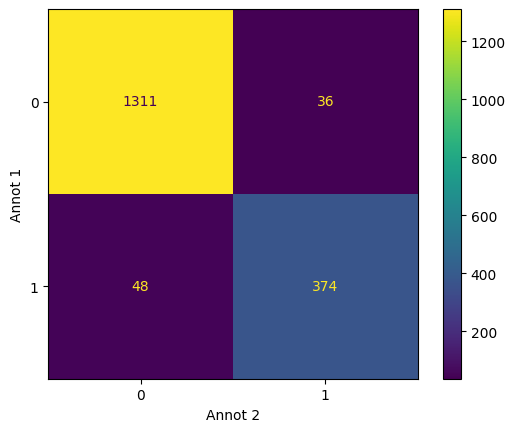

In [11]:
a = confusion_matrix(data_matrix_1[0],data_matrix_1[1])

cm_display = ConfusionMatrixDisplay(confusion_matrix = a, display_labels = [0, 1])

cm_display.plot()
plt.ylabel( "Annot 1") 
plt.xlabel( "Annot 2") 
plt.show()

## Inter-Annotator Agreement - Methodology #2

In [12]:
# Load JSON files
with open('pilot-ann/LV-v2/LV_dict_m2.json') as file:
    LV_annotations = json.load(file)
with open('pilot-ann/ZP-v2/ZP_dict_m2.json') as file:
    ZP_annotations = json.load(file)

# Assuming both annotators annotated the same items and the items are in the same order
# Extract annotations into a list of lists format for Krippendorff's alpha
items = sorted(LV_annotations.keys())  # Ensure consistent order of items
data_matrix_2 = [[], []]  # Preparing a 2-row matrix for two annotators

for item in items:
    LV = LV_annotations.get(item, None)
    ZP = ZP_annotations.get(item, None)
    
    # Append annotations to the matrix if both annotators have annotated the item
    if LV is not None and ZP is not None:
        data_matrix_2[0].append(int(LV))
        data_matrix_2[1].append(int(ZP))

# Convert the lists into a NumPy array for Krippendorff's alpha calculation
data_matrix_2 = np.array(data_matrix_2)

# Calculate and print Krippendorff's alpha
alpha_scalar = alpha(reliability_data=data_matrix_2, level_of_measurement='nominal')
print("Agreement B:", alpha_scalar)


Agreement B: 0.807047771054686


# Confusion Matrix #2

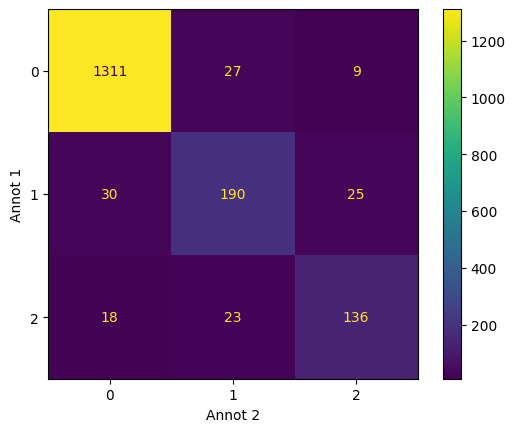

In [13]:
a = confusion_matrix(data_matrix_2[0],data_matrix_2[1])

cm_display = ConfusionMatrixDisplay(confusion_matrix = a, display_labels = [0, 1, 2])

cm_display.plot()
plt.ylabel( "Annot 1") 
plt.xlabel( "Annot 2") 
plt.show()

## Disagreeement Data Results

In [14]:
with open('pilot-ann/ZP-v2/ZP_dict_m1.json', 'r') as file:
    ZP_json = json.load(file)
with open('pilot-ann/LV-v2/LV_dict_m1.json', 'r') as file:
    LV_json = json.load(file)
disagreement_dict = {}

for key in ZP_json:
    if key in LV_json.keys():
        if LV_json[key] != ZP_json[key]:
            disagreement_dict[key] = ZP_json[key]

print(len(disagreement_dict))

with open('disagreement.json', 'w') as file:
    json.dump(disagreement_dict, file)

84


## Majority Data Results

In [15]:
majority_data = {k: ZP_dict[k] for k in ZP_dict if k in LV_dict and ZP_dict[k] == LV_dict[k]}
total_agreement_1 = sum(1 for label in majority_data.values() if label == "1")
total_agreement_0 = sum(1 for label in majority_data.values() if label == "0")
total_agreement_none = sum(1 for label in majority_data.values() if label == "")

print(f"Total Analyzed: {len(ZP_dict)}")
print(f"Total Agreement: {len(majority_data)}")
print(f"Total Agreement Label '1': {total_agreement_1}")
print(f"Total Agreement Label '0': {total_agreement_0}")
print(f"Total Agreement Label 'None': {total_agreement_none}")

with open('majority.json', 'w') as file:
    json.dump(majority_data, file, indent=4)

Total Analyzed: 1769
Total Agreement: 1637
Total Agreement Label '1': 136
Total Agreement Label '0': 190
Total Agreement Label 'None': 1311


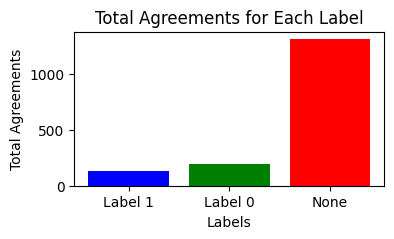

In [16]:
labels = ['Label 1', 'Label 0', 'None']
agreements = [total_agreement_1, total_agreement_0, total_agreement_none]

plt.figure(figsize=(4, 2))
plt.bar(labels, agreements, color=['blue', 'green', 'red'])
plt.xlabel('Labels')
plt.ylabel('Total Agreements')
plt.title('Total Agreements for Each Label')
plt.show()

## Data Proccessing for GPT Approach

In [17]:
with open('majority.json', 'r') as file:
    turn_labels = json.load(file)

for key, value in turn_labels.items():
    if value == "":
        turn_labels[key] = "0"
    elif value in ["0", "1"]:
        turn_labels[key] = "1"

folder_path = 'excel_files'
result_list = []

label_0 = []
label_1 = []

# set to track turn_ids from json files
json_turn_ids = set(turn_labels.keys())

for filename in os.listdir(folder_path):
    if filename.endswith('.xlsx'):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_excel(file_path)
 
        for index, row in df.iterrows():
            turn_id = row['turnID']
            
            if turn_id in json_turn_ids:
                user_id = row['userID']
                if user_id in [5]:
                    continue # ignore room mediator messages
                turn_msg = row['turnMSG']
                label = turn_labels[turn_id]
                result_list.append(f"{turn_id}: {turn_msg}, {label}")

                if label == '0':
                    label_0.append(label)
                elif label == '1':
                    label_1.append(label)

print(f"Total items: {len(result_list)}")
print(f"Total label '0': {len(label_0)}")
print(f"Total label '1': {len(label_1)}")
# for result in result_list:
#     print(result)

# if not result_list:
#     print("No matches found.")

with open('majority.json', 'w', encoding='utf-8') as file:
    json.dump(result_list, file, indent=4, ensure_ascii=False)


Total items: 1453
Total label '0': 1127
Total label '1': 326


### Data Balance

In [18]:
with open('majority.json', 'r') as file:
    data = json.load(file)

items_0 = [item for item in data if item.endswith('0')]
items_1 = [item for item in data if item.endswith('1')]

# downscale items that ends with 0
downscaled_0 = random.sample(items_0, len(items_1))
balanced_data = downscaled_0 + items_1
balanced_data_gpt = [item[:-3] for item in balanced_data]

# print((len(balanced_data)))
# for item in balanced_data:
#     print(item)
with open('balanced_majority.json', 'w', encoding='utf-8') as file:
    json.dump(balanced_data, file, indent=4, ensure_ascii=False)

#### Room Subjects

In [19]:
subjects_dict = {
    'RAC': {'pt': 'Racismo e discriminação',
            'en': 'Racism and discrimination'},
    'VES': {'pt': 'Julgar as pessoas pela forma de vestir', 
            'en': 'Judging people based on what they choose to wear'},
    'VAC': {'pt': 'Vacinação: Dever ou direito',
            'en': 'Vaccination: Right or duty'},
    'EST': {'pt': 'Estereótipos de beleza',
            'en': 'Beauty Stereotypes'},
}

## OpenAI Task

In [20]:
API_KEY = ""
client = OpenAI(api_key=API_KEY)

def get_text_subject(text):
    key = text[:3]
    return subjects_dict.get(key, {}).get('pt', 'Unknown Subject')

In [21]:
def prompt1(text):
    subject = get_text_subject(text)
    
    system_message = {
        "role": "system",
        "content": (
            "Definitions\n"
            "CLAIM is a controversial statement and the central component of an argument.\n"
            "PREMISE constitute the reasons for believing the claim to be true or false.\n"
            "Using the theory of Argument Mining and the definitions above, analyze the following TEXT"
            "to see if it returns a CLAIM and PREMISE relating to the SUBJECT topic.\n"
            "Standardize the outputs returned for each message with one of the following labels:\n"
            "'1' -> If TEXT has at least one CLAIM referring to the SUBJECT, "
            "OR if TEXT has a CLAIM AND a PREMISE referring to the SUBJECT.\n"
            "'0' -> If TEXT has neither a CLAIM nor a PREMISE referring to the SUBJECT"
        )
    }

    response = client.chat.completions.create(
        model="gpt-4o",
        messages=[
            system_message,
            {
                "role": "user",
                "content": text
            }
        ],
        temperature=0,
        max_tokens=2000,
        top_p=1,
        frequency_penalty=0,
        presence_penalty=0
    )

    return f"TEXT: {text[13:]}\nSUBJECT: {subject}\nRESPONSE: {response.choices[0].message.content}"

list_response = []
for m in balanced_data_gpt:
    response = prompt1(m)
    print(f'{response}\n')
    list_response.append(response)


TEXT: diz
SUBJECT: Racismo e discriminação
RESPONSE: '0'

TEXT: yes
SUBJECT: Racismo e discriminação
RESPONSE: '0'

TEXT: < outro idioma >
SUBJECT: Racismo e discriminação
RESPONSE: '0'

TEXT: Dedicado
SUBJECT: Racismo e discriminação
RESPONSE: 0

TEXT: As pessoas para além de seres racionais e emocionais 
SUBJECT: Racismo e discriminação
RESPONSE: 0

TEXT: sim era isso que deviamos fazer 
SUBJECT: Racismo e discriminação
RESPONSE: '0'

TEXT: Estou preparado para começar 
SUBJECT: Racismo e discriminação
RESPONSE: '0'

TEXT: Eu bater a um racista é racista!?
SUBJECT: Racismo e discriminação
RESPONSE: '0'

TEXT: Mas podia falar em Português
SUBJECT: Racismo e discriminação
RESPONSE: '0'

TEXT: opa sla
SUBJECT: Racismo e discriminação
RESPONSE: '0'

TEXT: boa < pessoa >
SUBJECT: Racismo e discriminação
RESPONSE: '0'

TEXT: sim
SUBJECT: Racismo e discriminação
RESPONSE: 0

TEXT: desculpa parceiro. irei melhorar os meus argumentos!👍🏼👍🏼👍🏼👍🏼👍🏼👍🏼
SUBJECT: Julgar as pessoas pela forma de vesti

### Write GPT Results

In [22]:
print(len(list_response))
with open("results/result_3.txt", "w", encoding="utf-8") as file:
    for item in list_response:
        file.write(f"{item}\n\n")

652


### True and Prediction Data
True: Majority labeled data between annotators (ZP and LV)

Prediction: GPT labeled data

In [23]:
data_prediction = []

for item in list_response:
    #print(item)
    data_prediction.append(item[-2:])

In [24]:
data_true = []
for item in balanced_data:
    #print(item)
    data_true.append(f'{item[-1:]}')

In [25]:
data_true = [str(item).strip("'") for item in data_true]
data_prediction = [item.strip().strip("'") for item in data_prediction]

In [26]:
# convert string labels to integer labels

data_true = [1 if item == '1' else 0 for item in data_true]
data_prediction = [1 if item == '1' else 0 for item in data_prediction]

print(len(data_true))
print(len(data_prediction))
print(data_true)
print(data_prediction)

652
652
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1

### Results

In [27]:
# binary accuracy (0 or 1)

print(f"F1: {f1_score(data_true, data_prediction)}")
print(f"Precision: {precision_score(data_true, data_prediction)}")
print(f"Recall: {recall_score(data_true, data_prediction)}")
print(f"Accuracy: {accuracy_score(data_true, data_prediction)}")

F1: 0.8940092165898618
Precision: 0.8953846153846153
Recall: 0.8926380368098159
Accuracy: 0.8941717791411042


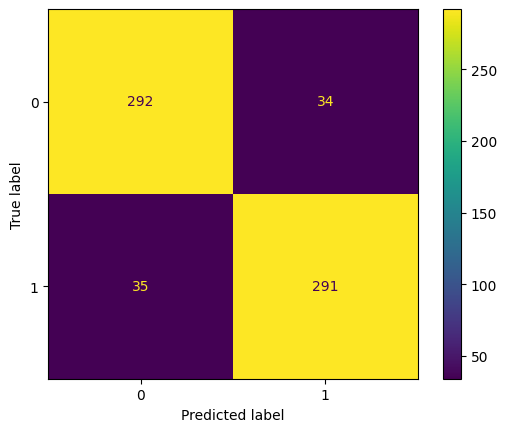

In [28]:
a = confusion_matrix(data_true, data_prediction)

cm_display = ConfusionMatrixDisplay(confusion_matrix = a, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [29]:
with open('balanced_gpt.json', 'w', encoding='utf-8') as file:
    json.dump(balanced_data_gpt, file, indent=4, ensure_ascii=False)

In [30]:
data_matrix_3 = []

data_matrix_3.append(data_prediction)
data_matrix_3.append(data_true)
data_matrix_3 = np.array(data_matrix_3)

print(data_matrix_3)
print(data_matrix_3.shape)

alpha_scalar = alpha(reliability_data=data_matrix_3, level_of_measurement='nominal')
print("Agreement C:", alpha_scalar)

[[0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]]
(2, 652)
Agreement C: 0.7885053739917149


In [31]:
path = 'corpus_sintetico.xlsx'
file = pd.ExcelFile(path)

data_gpt = []
data_ZP = []
data_LV = []

for sheet in file.sheet_names:
    df = pd.read_excel(path, sheet_name=sheet, usecols="D:F")
    data_gpt.extend(df.iloc[:, 0].tolist())
    data_ZP.extend(df.iloc[:, 1].tolist())
    data_LV.extend(df.iloc[:, 2].tolist())
    

# fill with 'None' if lists are not the same lenght
lenght = max(len(data_gpt), len(data_ZP), len(data_LV))
data_gpt.extend(['None'] * (lenght - len(data_gpt)))
data_ZP.extend(['None'] * (lenght - len(data_ZP)))
data_LV.extend(['None'] * (lenght - len(data_LV)))

def process_data(value):
    if pd.isna(value) or value == 'None':
        return 0
    elif value in [1.0, 0.0]:
        return 1
    else:
        return 0

data_gpt = [process_data(value) for value in data_gpt]
data_ZP = [process_data(value) for value in data_ZP]
data_LV = [process_data(value) for value in data_LV]

print(data_gpt)
print(data_ZP)
print(data_LV)
print(len(data_gpt))

[0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 

In [46]:
data_matrix_4 = []

data_matrix_4.append(data_gpt)
data_matrix_4.append(data_ZP)
data_matrix_4.append(data_LV)
data_matrix_4 = np.array(data_matrix_4)

print(data_matrix_4)
print(data_matrix_4.shape)

alpha_scalar = alpha(reliability_data=data_matrix_4, level_of_measurement='nominal')
print("Agreement D:", alpha_scalar)

[[0 1 0 ... 0 0 1]
 [0 1 1 ... 0 0 0]
 [0 1 1 ... 0 0 0]]
(3, 533)
Agreement D: 0.5715736616999534


In [41]:
matching_LV_ZP = [data_ZP[i] for i in range(len(data_ZP)) if data_ZP[i] == data_LV[i]]
filter_data_gpt = [data_gpt[i] for i in range(len(data_ZP)) if data_ZP[i] == data_LV[i]]

print(len(matching_LV_ZP))
print(len(filter_data_gpt))

492
492


In [43]:
print(f"F1: {f1_score(matching_LV_ZP, filter_data_gpt)}")
print(f"Precision: {precision_score(matching_LV_ZP, filter_data_gpt)}")
print(f"Recall: {recall_score(matching_LV_ZP, filter_data_gpt)}")
print(f"Accuracy: {accuracy_score(matching_LV_ZP, filter_data_gpt)}")

F1: 0.7213822894168467
Precision: 0.6231343283582089
Recall: 0.8564102564102564
Accuracy: 0.7378048780487805


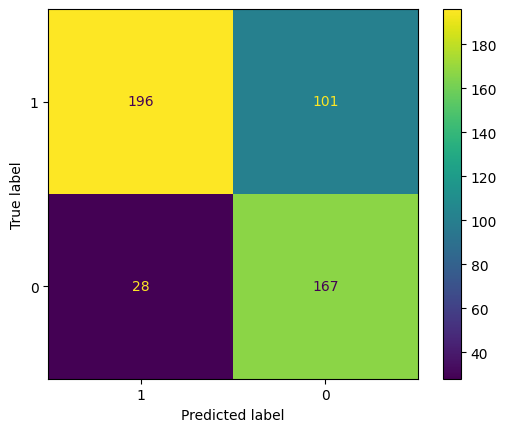

In [49]:
a = confusion_matrix(matching_LV_ZP, filter_data_gpt)

cm_display = ConfusionMatrixDisplay(confusion_matrix = a, display_labels = ["1", "0"])

cm_display.plot()
plt.show()